#### Import the libraries

In [66]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Load the MNIST digits dataset

In [3]:
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [55]:
X = digits.data
y = digits.target

#### Splitting into train and test data sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2778, random_state=42, stratify=y)

In [61]:
X_train.shape

(1297, 64)

In [62]:
X_test.shape

(500, 64)

In [63]:
y_train.shape

(1297,)

In [64]:
y_test.shape

(500,)

#### Viewing an image

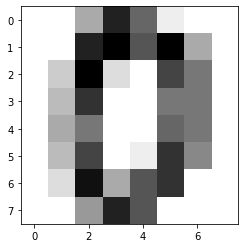

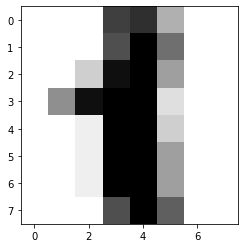

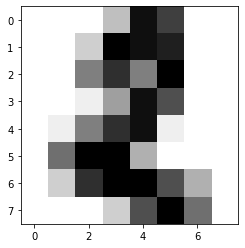

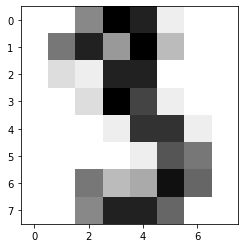

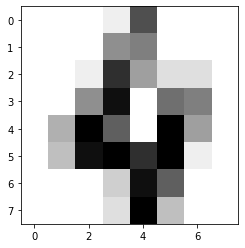

In [68]:
for i in range(5):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

#### Function to Calculate Euclidean Distance

In [69]:
def euclidean_distance(features, predict):
    euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
    return euclidean_distance

#### Function to implement K-Nearest Neighbors

In [86]:
def knn(X_train, y_train, test_point, k):
    
    distances = [] 
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean_distance(test_point, data_point), label))

    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    
    majority_vote = labels[counts.argmax()]

    return majority_vote

#### Function to calculate accuracy

In [88]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return round(accuracy* 100, 2)

#### Testing the KNN Model with 5 neighbors

In [115]:
%%time
calculate_accuracy(X_test, y_test, X_train, y_train, 5)

Wall time: 9.33 s


98.6

#### Plotting the accuracy graph vs different value of K ranges to determine Optimal Number of Neighbors

In [97]:
k_range=range(1,10)
scores=[]
for k in k_range:
    scores.append(calculate_accuracy(X_test, y_test, X_train, y_train, k))
print(scores)

[98.6, 98.6, 98.6, 98.4, 98.6, 98.2, 98.4, 98.0, 97.8]


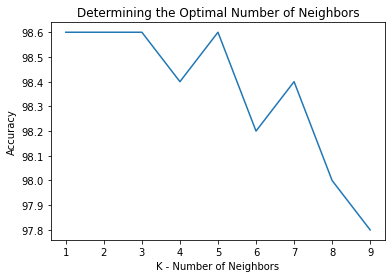

In [103]:
plt.plot(range(1,10), scores)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()